### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 5.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

Стандартизация

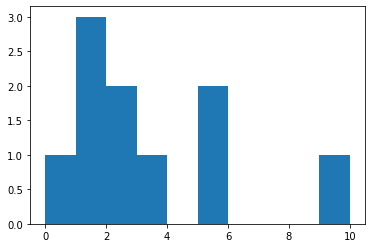

In [9]:
plt.hist(X[1])
plt.show()

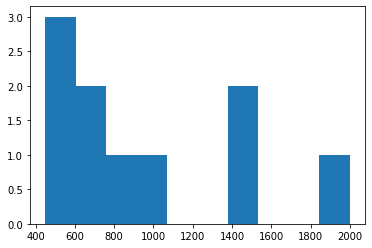

In [10]:
plt.hist(X[2])
plt.show()

In [11]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [12]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

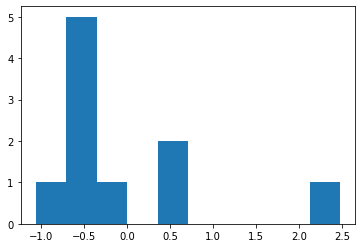

In [13]:
plt.hist(X_st[1])
plt.show()

In [14]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [22]:
# sklearn.StandartScaler() #Стандартизайия
# sklearn.MinMaxScaler() #Нормализация

In [23]:
X_st[2] = calc_std_fit(X[2])

In [24]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

SGD (Stochastic gradient descent)

In [25]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [26]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [27]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [49.14906205  5.38481653  2.53769411  4.42806197] 82.6175728141479
200 [55.52512187  5.65312235  1.99299032  4.78764786] 26.83837794084593
300 [56.3707121   5.81930406  1.54438422  5.08840269] 25.54450348523988
400 [56.4828539   5.93409343  1.18508957  5.34650361] 25.31706044831365
500 [56.49772609  6.01629591  0.8957756   5.56407873] 25.178030001329997
600 [56.49969844  6.07703061  0.66190729  5.74540092] 25.086157043476863
700 [56.49996001  6.12307736  0.47235317  5.89539516] 25.025207954319974
800 [56.4999947   6.15870266  0.31843509  6.01887199] 24.984737013600483
900 [56.4999993   6.18668895  0.19329737  6.12019197] 24.957853182273933
1000 [56.49999991  6.20892069  0.09147202  6.20315203] 24.939991698472785


array([56.49999991,  6.20892069,  0.09147202,  6.20315203])

In [28]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [29]:
eval_sgd_model(X_st, y, iterations=50000, qty_in_batch=4, alpha=1e-2)

5000 [56.5106203   6.31268791 -0.36442309  6.58448679] 11.289402609295017
10000 [56.51062035  6.31272262 -0.36459079  6.58462533] 11.28918200733774
15000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330378
20000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
25000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
30000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
35000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
40000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
45000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
50000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403


array([56.51062035,  6.31272262, -0.3645908 ,  6.58462533])

L1 регуляризация

L2 регуляризация

In [30]:
# lambda = lambda_/2

In [31]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [32]:
W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

In [33]:
W

array([56.49717514,  6.30231751, -0.35424091,  6.56978425])

In [34]:
eval_model(X_st, y, iterations=5000, alpha=1e-2)

500 [56.49767254  5.83477719  1.36781865  5.25424451] 25.413829625514786
1000 [56.4999999   6.17124081  0.25269258  6.07416416] 24.969784391475397
1500 [56.5         6.2575128  -0.13774522  6.39128671] 24.913059475565493
2000 [56.5         6.28678323 -0.27772011  6.50655795] 24.905712417850083
2500 [56.5         6.29722767 -0.32807425  6.54810646] 24.904760553791704
3000 [56.5         6.30098239 -0.34619733  6.56306445] 24.904637232271696
3500 [56.5         6.30233363 -0.3527205   6.5684486 ] 24.904621254991206
4000 [56.5         6.30281999 -0.35506846  6.57038658] 24.904619185007867
4500 [56.5         6.30299505 -0.35591359  6.57108415] 24.904618916825108
5000 [56.5         6.30305806 -0.35621778  6.57133523] 24.90461888207993


array([56.5       ,  6.30305806, -0.35621778,  6.57133523])

## Д/з

#### Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод

In [36]:
def w_from_lambda(lambda_):
    w=eval_model_reg2(X_st, y,5000, 1e-2, lambda_)
    return w

In [38]:
lambdas=np.logspace(-2,2,100,dtype=float)
w_array=np.ndarray(shape=(0,4))

for lambda_ in lambdas:
    w=w_from_lambda(lambda_)
    #print(w)     
    w_array=np.append(w_array,np.array([w]),axis=0)

Text(0.5, 1.0, 'W4')

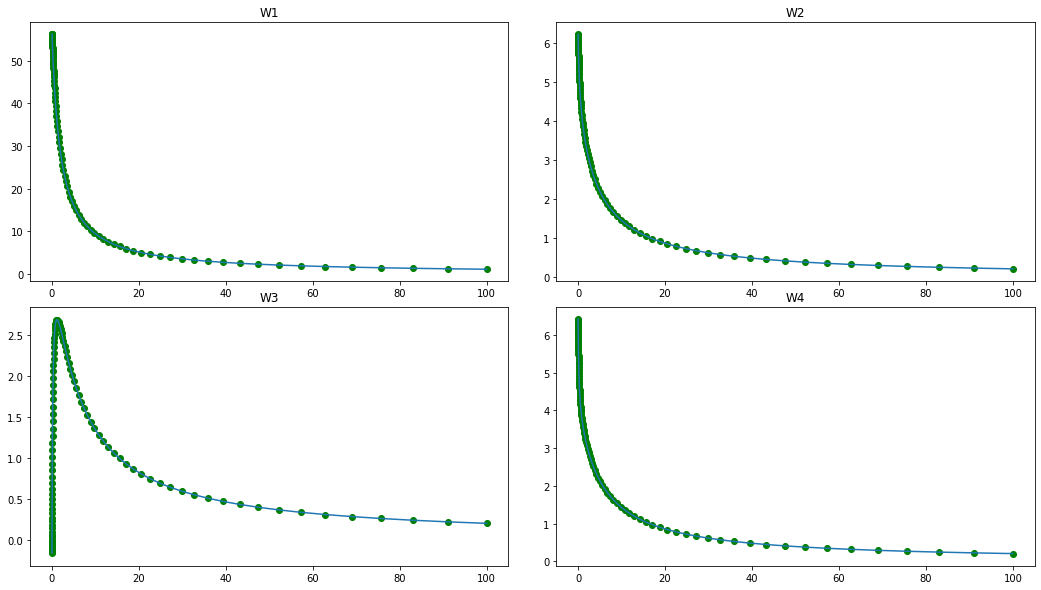

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

fig.set_size_inches(18, 10)
fig.subplots_adjust(wspace=0.1, hspace=0.1)


ax1.scatter(lambdas, w_array[:, 0], c='g')
ax1.plot(lambdas, w_array[:, 0])
ax1.set_title('W1')


ax2.scatter(lambdas, w_array[:, 1], c='g')
ax2.plot(lambdas, w_array[:, 1])
ax2.set_title('W2')


ax3.scatter(lambdas, w_array[:, 2], c='g')
ax3.plot(lambdas, w_array[:, 2])
ax3.set_title('W3')


ax4.scatter(lambdas, w_array[:, 3], c='g')
ax4.plot(lambdas, w_array[:, 3])
ax4.set_title('W4')



#### Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Нормализация выполняется по формуле: $x^{j}_{i} = \frac{x^{j}_{i} - min_{j} (x^{j}_{i})}{max_{j} (x^{j}_{i})-min_{j} (x^{j}_{i})} - $ с целью, чтобы значение каждого из признаков находилось в диапазоне [0-1]

Стандартизация расчитывается по следующим форммулам: $x^{j}_{i}=\frac{x^{j}_{i} - \mu_{j}}{\sigma_{j}}.$; $\sigma_{j} = \sqrt{\frac{1}{l}\sum^{l}_{i=1}(x^{j}_{i}-\mu_{j})^{2}}$; $\mu_{j} = \frac{1}{l}\sum^{l}_{i=1}x^{j}_{i}$ - с целью нахождения сдвига относительно среднего т.е. признак имеет среднее 0 и дисперсию 1.

Одновременно иметь минимум в 0(Нормализация) и среднее в 0 (стандартизация) - невозможно (для невырожденных случаев) т.е. к одному и тому же признаку применять сразу и нормализацию, и стандартизацию бессмысленно.

#### Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

$L_{1}$-регуляризация определяется по формуле 

$$||w||_{1} = \sum^{d}_{j=1}|w_{j}|.$$

In [49]:
def eval_model_reg3(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_*np.sign(W) ) 
        if i % (iterations / 10) == 0:
              print(i, W, err)
    return W

In [50]:
eval_model_reg3(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

500 [56.49765252  5.89983016  1.03995035  5.52753399] 25.23723048428871
1000 [56.49994991  6.19557479  0.13437972  6.1719267 ] 24.946863925110584
1500 [56.49995     6.26619417 -0.18003166  6.42624591] 24.910108007836477
2000 [56.49995     6.28977817 -0.29255956  6.51886362] 24.905338328495585
2500 [56.49995     6.29817619 -0.33303449  6.55225795] 24.90471511007812
3000 [56.49995     6.30119434 -0.34760164  6.56428089] 24.904632468343546
3500 [56.49995     6.30228045 -0.35284488  6.5686086 ] 24.904621077947176
4000 [56.49995     6.30267138 -0.35473214  6.57016633] 24.904619356208052
4500 [56.49995     6.30281209 -0.35541145  6.57072702] 24.90461904458914
5000 [56.49995     6.30286274 -0.35565596  6.57092884] 24.904618972342195


array([56.49995   ,  6.30286274, -0.35565596,  6.57092884])